In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('weight-height.csv')

In [22]:
df.head()

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
df.drop('Gender',axis=1,inplace=True)

In [24]:
df.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [25]:
df.shape

(10000, 2)

Text(0, 0.5, 'height')

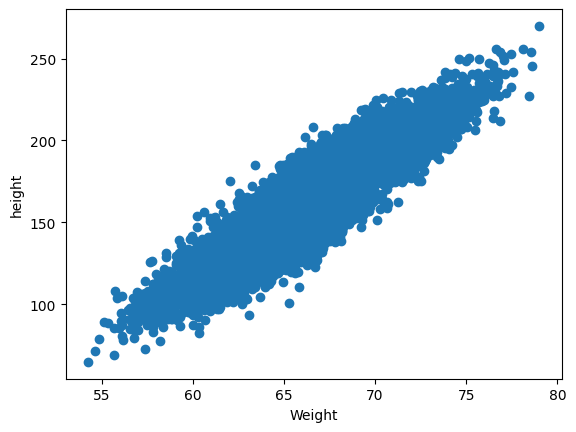

In [27]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('height')


In [28]:
df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


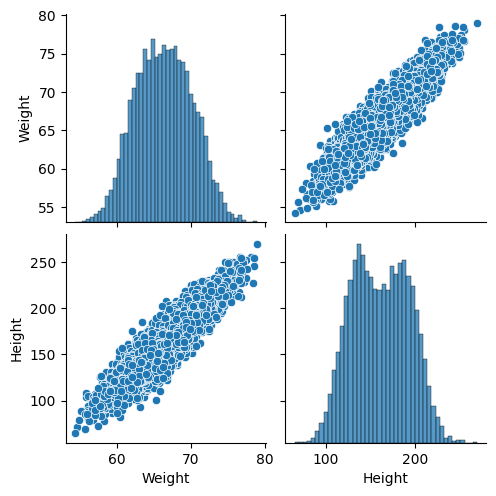

In [29]:
import seaborn as sns 

sns.pairplot(df)

In [30]:
## Independent and Dependent features.
x = df['Weight']
y = df['Height']

In [31]:
x

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Weight, Length: 10000, dtype: float64

In [32]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Height, Length: 10000, dtype: float64

In [37]:
x = df[['Weight']] ## Indendent feature should be 2 Dimensional array or dataframe.

In [38]:
type(x)
np.array(x)

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]], shape=(10000, 1))

In [39]:
x

,Weight
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [40]:
x = df['Weight']

In [43]:
x.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Weight, dtype: float64

In [42]:
x

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Weight, Length: 10000, dtype: float64

In [44]:
X = df[['Weight']]
Y = df['Height']

In [47]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
## for applying standardization on X_test we will use transform only which means that we will be using mean,
## and standard deviation of X_train data.
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [51]:
print("Coefficient : ",model.coef_)
print("Intercept : ",model.intercept_)

Coefficient :  [29.59862269]
Intercept :  161.23075926318265


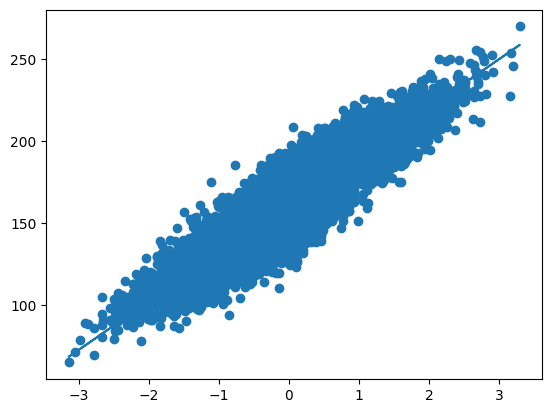

In [53]:
## plot best fit line.

plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train))

In [54]:
## Prediction for test data.
model.predict(X_test)

array([179.24550972, 180.3400163 , 161.61418442, ..., 117.31727114,
       167.19289954, 170.83489876], shape=(2500,))

In [55]:
y_pred = model.predict(X_test)

In [56]:
## Performance Metrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

149.31479307438
9.720990891992404
12.21944323913246


In [58]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)

In [59]:
print(score)

0.8573532043041168


In [60]:
## adjusted r squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8572960999023169

In [62]:
## OLS Linear regression
!pip install statsmodels
import statsmodels.api as sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 5.0 MB/s eta 0:00:00a 0:00:01m


In [63]:
regression = sm.OLS(Y_train,X_train).fit()

In [64]:
prediction = regression.predict(X_test)

In [65]:
print(prediction)

[ 18.01475046  19.10925704   0.38342516 ... -43.91348812   5.96214028
   9.60413949]


In [66]:
print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.3
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                    1.09e-55
Time:                        23:29:41   Log-Likelihood:                         -48785.
No. Observations:                7500   AIC:                                  9.757e+04
Df Residuals:                    7499   BIC:                                  9.758e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
## Prediciton for new Data
model.predict(Scaler.transform([[65]]))

/Users/vaibhavkale/ML Learnings/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([150.84540405])